In [25]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten


In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
num_classes = 10

In [18]:
epochs = 3

In [19]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [20]:
X_test = X_test.reshape(10000,28,28,1)

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [22]:
X_train.shape

(60000, 28, 28, 1)

In [23]:
cnn = Sequential()

In [28]:
cnn.add(Conv2D(32, kernel_size = (5,5), input_shape=(28,28,1), padding='same', activation='relu'))

In [29]:
cnn.add(MaxPooling2D())

In [31]:
cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))

In [32]:
cnn.add(MaxPooling2D())

In [33]:
cnn.add(Flatten())

In [34]:
cnn.add(Dense(1024, activation='relu'))

In [36]:
cnn.add(Dense(10, activation='softmax'))

In [38]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
__________

### Training the Model

In [46]:
history_cnn = cnn.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_train, y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 269s 4ms/step - loss: 0.3304 - acc: 0.9353 - val_loss: 0.1283 - val_acc: 0.9842
Epoch 2/5
60000/60000 [==============================] - 283s 5ms/step - loss: 0.0925 - acc: 0.9860 - val_loss: 0.0458 - val_acc: 0.9931
Epoch 3/5
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0492 - acc: 0.9902 - val_loss: 0.0436 - val_acc: 0.9896
Epoch 4/5
60000/60000 [==============================] - 277s 5ms/step - loss: 0.0353 - acc: 0.9913 - val_loss: 0.0238 - val_acc: 0.9938
Epoch 5/5
60000/60000 [==============================] - 279s 5ms/step - loss: 0.0253 - acc: 0.9939 - val_loss: 0.0159 - val_acc: 0.9959


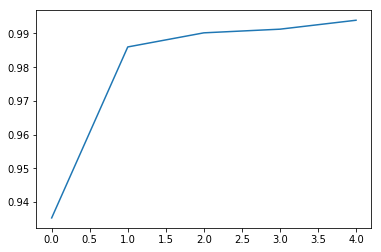

In [48]:
plt.plot(history_cnn.history['acc'])

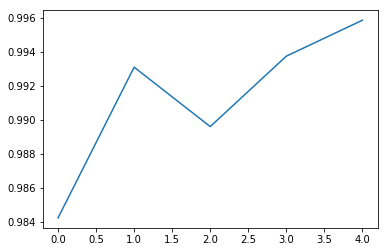

In [51]:
plt.plot(history_cnn.history['val_acc'])

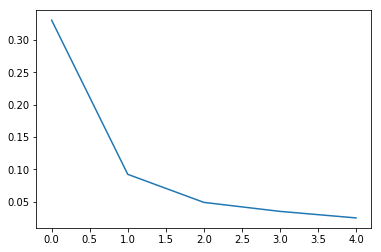

In [52]:
plt.plot(history_cnn.history['loss'])

In [53]:
cnn.save_weights('cnn_weights.h5')

In [55]:
cnn.save('cnn_model.h5')